In [4]:
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pandas as pd
import numpy as np





In [5]:
pd.read_excel('classmap.xlsx').to_csv('classmap.csv', index = False)

In [6]:
#Load the VGG model
image_size = 224
# vgg_conv = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))

res_model = ResNet50(include_top=False,weights='imagenet',input_shape=(image_size,image_size,3))

In [7]:
model_result = dict()
model_result['acc'] = dict()
model_result['loss'] = dict()
model_result['val_acc'] = dict()
model_result['val_loss'] = dict()

In [8]:
for layer in res_model.layers[:-8]:
    layer.trainable=False
    
# Check the trainable status of the individual layers
for layer in res_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fe5f0ceb4e0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fe6c5989470> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe5f0ceb9e8> False
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fe5f0c60ac8> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fe5f0c089e8> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fe5f0c08940> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe5f0119eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe5f00e89e8> False
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fe5f0069518> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fe5f0073630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe5f00735c0> False
<tensorflow.python.keras.layers.nor

In [9]:

 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(res_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1

In [10]:


batch_size = 32
train_data_dir = './dataset/training_set/'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
    )

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Found 704 images belonging to 7 classes.
Found 172 images belonging to 7 classes.


In [11]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
# model.save('small_last4.h5')

Epoch 1/20
22/22 [==============================] - 17s 770ms/step - loss: 1.5806 - acc: 0.5327 - val_loss: 1.6078 - val_acc: 0.6570
Epoch 2/20
22/22 [==============================] - 13s 606ms/step - loss: 0.7882 - acc: 0.7599 - val_loss: 1.0704 - val_acc: 0.7209
Epoch 3/20
 3/22 [===>..........................] - ETA: 5s - loss: 0.4416 - acc: 0.8542

KeyboardInterrupt: 

In [9]:
def re_map(classmap_path, pred, gen_class_indices):
    classmap = pd.read_csv(classmap_path,header=None)
    classmap = dict(classmap.values)

    label_mapping = train_generator.class_indices
    label_mapping_reverse = { v:k for k,v in label_mapping.items() }
    correct_predict = [ classmap[label_mapping_reverse[i]] for i in pred]
    return correct_predict



In [10]:
def make_submission(sample_path, id_, pred, sub_name):
    
    df = pd.read_csv(sample_path)

    ans = pd.DataFrame()
    ans[df.columns[0]] = id_
    ans[df.columns[1]] = pred
    ans.to_csv(sub_name, index = False)
    
    

# pd.read_csv('submission.csv')

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tqdm import tqdm
from time import sleep

In [12]:
pbar = tqdm(total=100, ncols=150) 
for i in range(10): 
    sleep(0.1)
    pbar.update(10) 
pbar.close() 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 99.32it/s]


## load_img

In [19]:

pred = []
id_ = []
test_len = len([name for name in os.listdir("./dataset/testing_set/data/") if os.path.isfile(os.path.join("./dataset/testing_set/data/", name))])

# pbar = tqdm(total=test_len) 
with tqdm(total=test_len) as pbar: 
    for root, dirs, files in os.walk("./dataset/testing_set", topdown=False):
        for name in files:
    #         lis.append(os.path.join(root, name))
            img = load_img(os.path.join(root, name), target_size=(image_size, image_size))
    #         print(type(img))
            img = img_to_array(img) # == np.asarray(img)
            img = preprocess_input(img)
            img = np.array([img])  # Convert single image to a batch.
            predictions = model.predict(img, verbose = 0)
            pred.append(np.argmax(predictions))
            id_.append(name[:-4])
            pbar.update(1) 
correct_predict = re_map('./classmap.csv', pred, train_generator.class_indices)

make_submission('./sample_submission.csv', id_, correct_predict, 'no_pre_keras_load_predict.csv')

  5%|▍         | 18/366 [00:01<00:22, 15.61it/s]


KeyboardInterrupt: 

## predict_generater

In [23]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_data_dir = "./dataset/testing_set"
# test_data_dir = '/data/examples/dog_CLASS/dog1/testing_set/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

pred=model.predict_generator(test_generator, verbose = 1)
predicted_class_indices = np.argmax(pred,axis=1)

id_ = [i[5:-4] for i in test_generator.filenames]
    
correct_predict = re_map('./classmap.csv', predicted_class_indices, train_generator.class_indices)

make_submission('./sample_submission.csv', id_, correct_predict, 'keras_generater_predict.csv')

Found 366 images belonging to 1 classes.
104/366 [=======>......................] - ETA: 18s

KeyboardInterrupt: 

## opencv read img

In [22]:
import cv2 
import os
# img_lis = []
pred = []
id_ = []
test_len = len([name for name in os.listdir("./dataset/testing_set/data/") if os.path.isfile(os.path.join("./dataset/testing_set/data/", name))])

with tqdm(total=test_len) as pbar: 
    for root, dirs, files in os.walk("./dataset/testing_set", topdown=False):
        for name in files:
            img = cv2.imread(os.path.join(root, name))[:,:,::-1]
    #         img_lis.append(img)
    #         print(img.shape)
            img = cv2.resize(img, (image_size, image_size))
            img = img.astype('float32')
            img = preprocess_input(img)
            img = np.array([img])
            predictions = model.predict(img, verbose = 0)
            pred.append(np.argmax(predictions))
            id_.append(name[:-4])
            pbar.update(1) 
correct_predict = re_map('./classmap.csv', pred, train_generator.class_indices)

make_submission('./sample_submission.csv', id_, correct_predict, 'pre_opencv_load_predict.csv')

  4%|▍         | 14/366 [00:00<00:22, 15.62it/s]


KeyboardInterrupt: 

(1, 224, 224, 3)

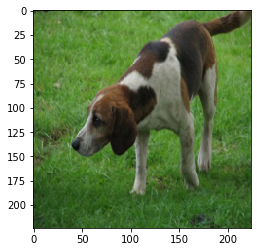

In [84]:
import matplotlib.pyplot as plt
a = cv2.resize(img_lis[0], (image_size, image_size))
plt.imshow(a)
input_arr = np.array([a])
input_arr.shape

In [15]:
### testing acc : 0.9071

# 視覺化

In [16]:
experiment = "transfer" 

model_result['acc'][experiment] = model.history.history.get('acc')
model_result['val_acc'][experiment] = model.history.history.get('val_acc')
model_result['loss'][experiment] = model.history.history.get('loss')
model_result['val_loss'][experiment] = model.history.history.get('val_loss')

In [17]:
#@title Model Result { vertical-output: true }
import matplotlib.pyplot as plt
import numpy as np

# training loss
for i in model_result['loss'].keys():
    plt.plot(np.arange(len(model_result['loss'][i])), model_result['loss'][i], label = i)

plt.legend(loc='best')
plt.title('loss')
plt.show()

# training acc
for i in model_result['acc'].keys():
    plt.plot(np.arange(len(model_result['acc'][i])), model_result['acc'][i], label = i)

plt.legend(loc='best')
plt.title('acc')
plt.show()

# valid loss
for i in model_result['val_loss'].keys():
    plt.plot(np.arange(len(model_result['val_loss'][i])), model_result['val_loss'][i], label = i)

plt.legend(loc='best')
plt.title('val_loss')
plt.show()


# valid acc
for i in model_result['val_acc'].keys():
    plt.plot(np.arange(len(model_result['val_acc'][i])), model_result['val_acc'][i], label = i)

plt.legend(loc='best')
plt.title('val_acc')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>